In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
info = "http://bit.ly/w-data"
data = pd.read_csv(info)


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


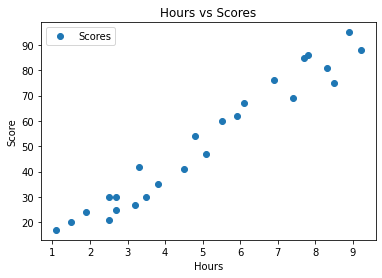

In [9]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.show()

We can see a linear relation between hours and scores
divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values 


The next step is to split this data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

Training the model

In [12]:
from sklearn.linear_model import LinearRegression  
l_regression = LinearRegression()  
l_regression.fit(X_train, Y_train) 

print("Training complete")

Training complete


Plotting the regression line

In [13]:
line = l_regression.coef_*X+l_regression.intercept_


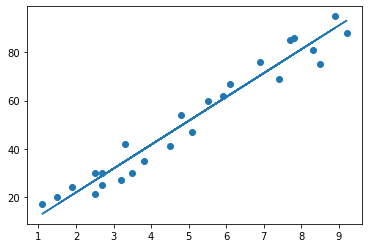

In [14]:
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

Prediction

In [15]:
Y_pred = l_regression.predict(X_test)

Comparing actual vs predicted

In [16]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


predict with own data

In [18]:
own_prediction = l_regression.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(np.array([9.25]).reshape(1, 1)))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


Evaluating the model using mean square error

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
